In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [116]:
df = pd.read_csv('data/processed/telco_churn_feature_binned.csv')
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,TenureBins,PhoneService,MultipleLines,InternetService,CommunicationType,TotalInternetServices,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,New,No,No,DSL,Internet Only,1,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,Mature,Yes,No,DSL,Phone and Internet,2,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [117]:
binary_features = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for column in binary_features:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

df.head(5)


,gender,SeniorCitizen,Partner,Dependents,TenureBins,PhoneService,MultipleLines,InternetService,CommunicationType,TotalInternetServices,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,New,0,0,DSL,Internet Only,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,Mature,1,0,DSL,Phone and Internet,2,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,New,1,0,DSL,Phone and Internet,2,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,Long Term,0,0,DSL,Internet Only,3,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,New,1,0,Fiber optic,Phone and Internet,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [118]:
nominal_features = ['gender', 'InternetService', 'Contract', 'PaymentMethod']
ordinal_features = ['TenureBins', 'CommunicationType']
numerical_features = ['MonthlyCharges', 'TotalCharges']
remainder_features = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'TotalInternetServices', 'Churn']
                   

### Scikit learn Pipeline

In [119]:
numerical_transformer = Pipeline(
                                steps= [
                                    ('scaler', StandardScaler())
                                ]
                            )

nominal_transformer = Pipeline(
                                steps=[
                                    ('encoder', OneHotEncoder())
                                ]
                            )

ordinal_categories = [
    ['New', 'Early', 'Established', 'Mature', 'Long Term', 'Veteran'],
    ['No Service', 'Phone Only', 'Internet Only', 'Phone and Internet']
]

ordinal_transformer = Pipeline(
                                steps=[
                                    ('encoder', OrdinalEncoder(categories=ordinal_categories))
                                ]
                            )

preprocessor = ColumnTransformer(
                                transformers=[
                                    ('nom', nominal_transformer, nominal_features),
                                    ('ord', ordinal_transformer, ordinal_features),
                                    ('num', numerical_transformer, numerical_features),   
                                ],
                                remainder='drop'
                            )

nominal_feature_names = []
for feature in nominal_features:
    unique_values = df[feature].unique()
    nominal_feature_names.extend([f'{feature}_{val}' for val in unique_values])

df_cp = df.copy()
df_transformed = pd.DataFrame(
                                preprocessor.fit_transform(df_cp),
                                columns = nominal_feature_names+ordinal_features+numerical_features
                            )

df_remainder = df[remainder_features]
df_pp = pd.concat([df_transformed, df_remainder], axis=1)

df_pp.head(15)



,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,TotalInternetServices,Churn
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,1,0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,2,0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,1,0,0,0,0,1,2,1
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,1,0,1,1,0,0,0,3,0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
5,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,1,1,1,3,1
6,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,0,1,0,0,1,0,1,2,0
7,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
8,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,1,1,1,1,1,4,1
9,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,1,1,0,0,0,0,0,2,0


In [120]:
df_pp.to_csv('data/processed/telco_churn_final_dataset.csv', index=False)

### Handle Class Imbalance

In [121]:
X = df_pp.drop(columns=['Churn'])
Y = df_pp['Churn']

In [122]:
X_train, X_test,  Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [123]:
print(Y_train.isnull().sum())


0


In [124]:
df_pp[df_pp['TotalCharges'].isna()]

,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,TotalInternetServices,Churn


In [125]:
df_pp.head(10)

,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,TotalInternetServices,Churn
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,1,0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,2,0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,1,0,0,0,0,1,2,1
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,1,0,1,1,0,0,0,3,0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
5,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,1,1,1,3,1
6,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,0,1,0,0,1,0,1,2,0
7,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
8,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,1,1,1,1,1,4,1
9,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,1,1,0,0,0,0,0,2,0


In [126]:
print(Y_train.head(10))

2142    0
1623    0
6074    1
1362    1
6754    0
1212    0
2722    0
4006    0
6791    1
5466    0
Name: Churn, dtype: int64


In [127]:
print(Y_train.dtype)

int64


In [128]:
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

Text(0, 0.5, 'Count')

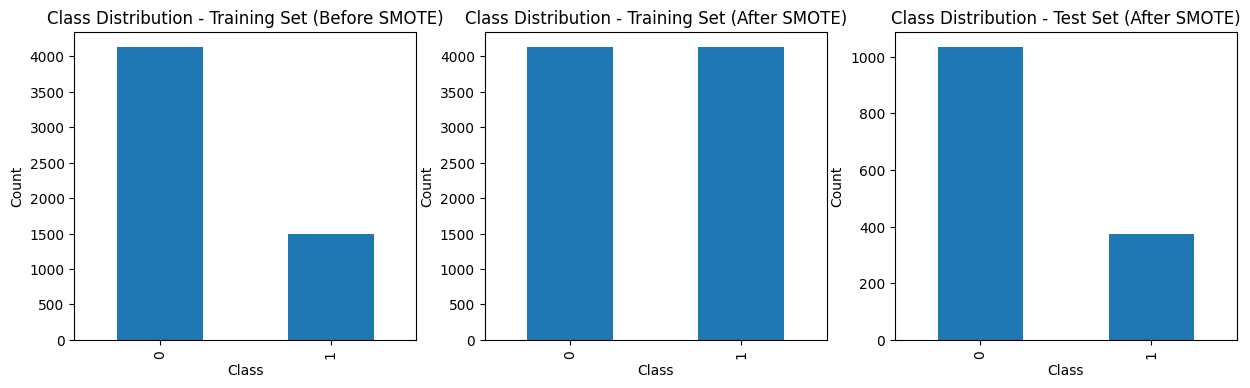

In [129]:
plt.figure(figsize=(15, 4))

plt.subplot(131) # nrows=1 ncols=3 index=1
Y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution - Training Set (Before SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(132)
Y_train_resampled.value_counts().plot(kind='bar')
plt.title('Class Distribution - Training Set (After SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(133)
Y_test.value_counts().plot(kind='bar')
plt.title('Class Distribution - Test Set (After SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')

In [130]:
np.savez('artifacts/X_train.npz', X_train_resampled)
np.savez('artifacts/Y_train.npz', Y_train_resampled)
np.savez('artifacts/X_test.npz', X_test)
np.savez('artifacts/Y_test.npz', Y_test)